# TMDB - Box Office Prediction Challenge

### Referências 

* https://www.kaggle.com/c/tmdb-box-office-prediction

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ast
from collections import Counter
import itertools

# Algoritmos de Regressão
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

#Seleção de Modelos
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

#Métricas
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [2]:
train = pd.read_csv(r'C:\Users\LENOVO\Downloads\tmdb-box-office-prediction\train.csv')
test = pd.read_csv(r'C:\Users\LENOVO\Downloads\tmdb-box-office-prediction\test.csv')

In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [5]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [6]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

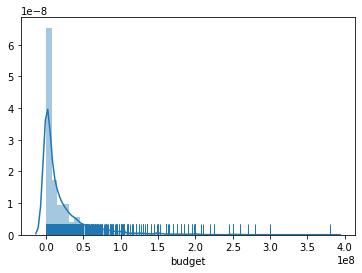

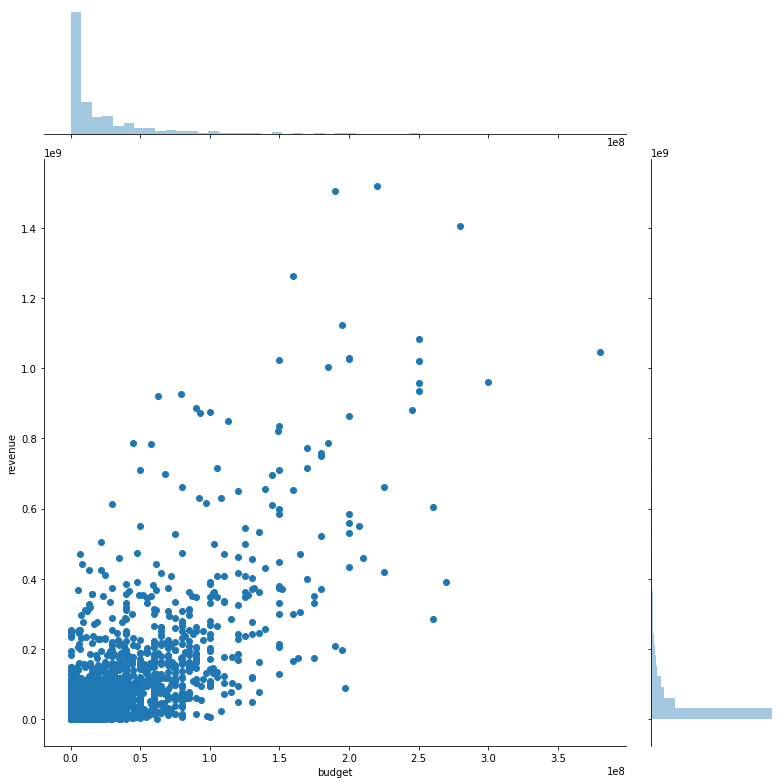

In [7]:
#Verificando a distribuição da variável Budget
sns.distplot(train.budget, rug = True)
sns.jointplot(x='budget', y='revenue', data=train, height=11, ratio=4)

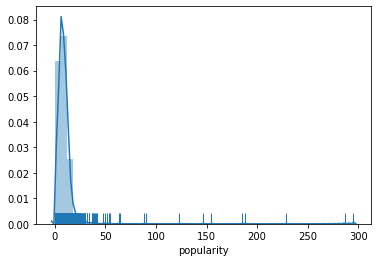

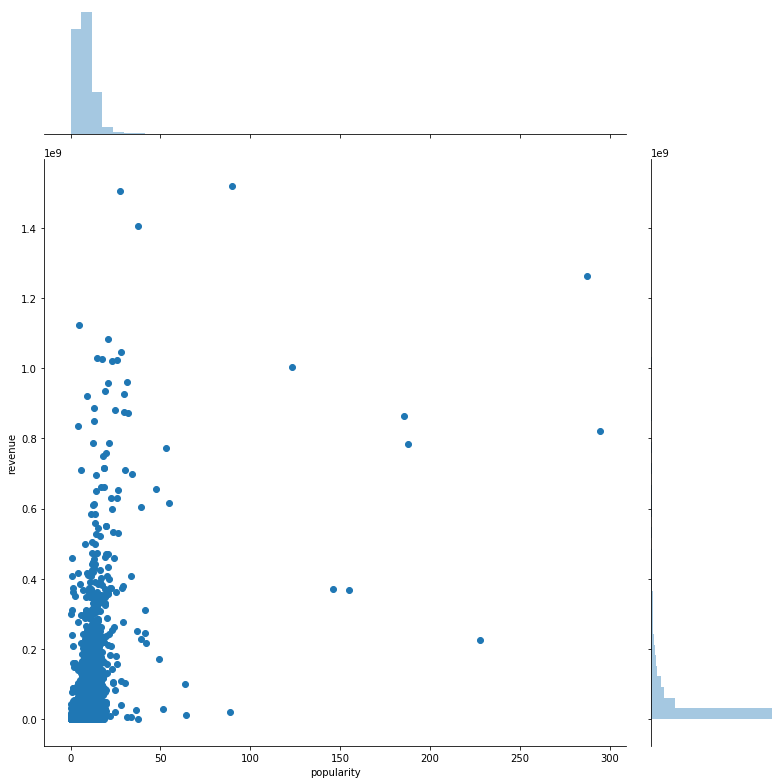

In [8]:
#Verificando a distribuição da variável popularity
sns.distplot(train.popularity, rug = True)
sns.jointplot(x='popularity', y='revenue', data=train, height=11, ratio=4)

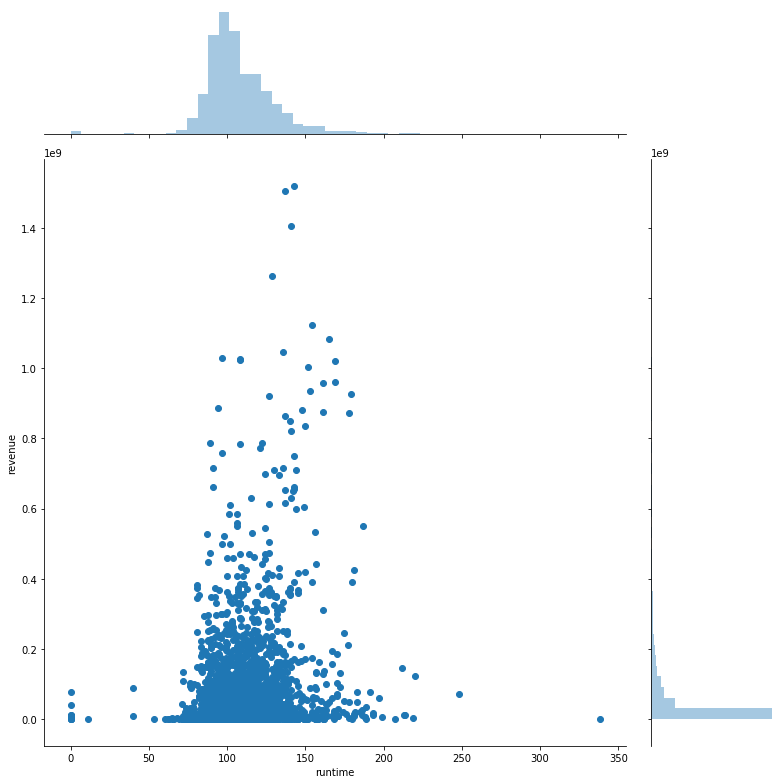

In [9]:
#Verificando a distribuição da variável 
sns.jointplot(x='runtime', y='revenue', data=train, height=11, ratio=4)

In [10]:
test.loc[test.release_date.isna(), 'release_date'] = '05/01/00'

In [11]:
# Transformando a coluna de datas em colunas separadas de dia, mês e ano no treino.
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).astype(int)
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900
train["release_dayofweek"] = [t.dayofweek for t in pd.DatetimeIndex(train.release_date)]
train['release_quarter'] = [t.quarter for t in pd.DatetimeIndex(train.release_date)]

# Transformando a coluna de datas em colunas separadas de dia, mês e ano no teste.
test[['release_month','release_day','release_year']]=test['release_date'].str.split('/',expand=True).astype(int)
test.loc[ (test['release_year'] <= 19) & (test['release_year'] < 100), "release_year"] += 2000
test.loc[ (test['release_year'] > 19)  & (test['release_year'] < 100), "release_year"] += 1900
test["release_dayofweek"] = [t.dayofweek for t in pd.DatetimeIndex(test.release_date)]
test['release_quarter'] = [t.quarter for t in pd.DatetimeIndex(test.release_date)]


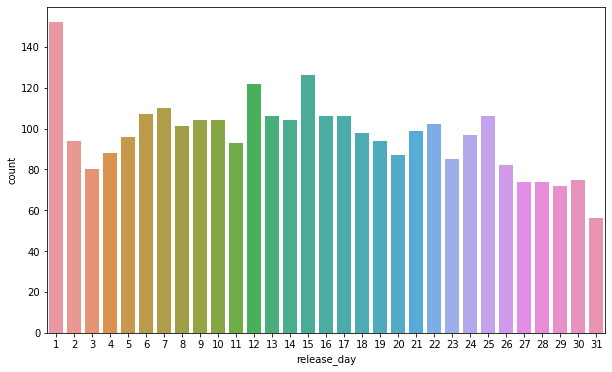

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(train['release_day'].sort_values())

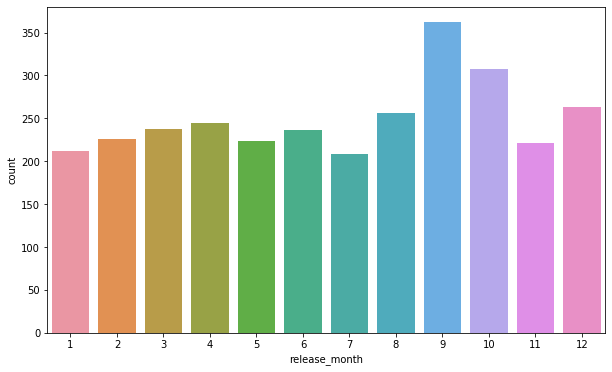

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(train['release_month'].sort_values())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

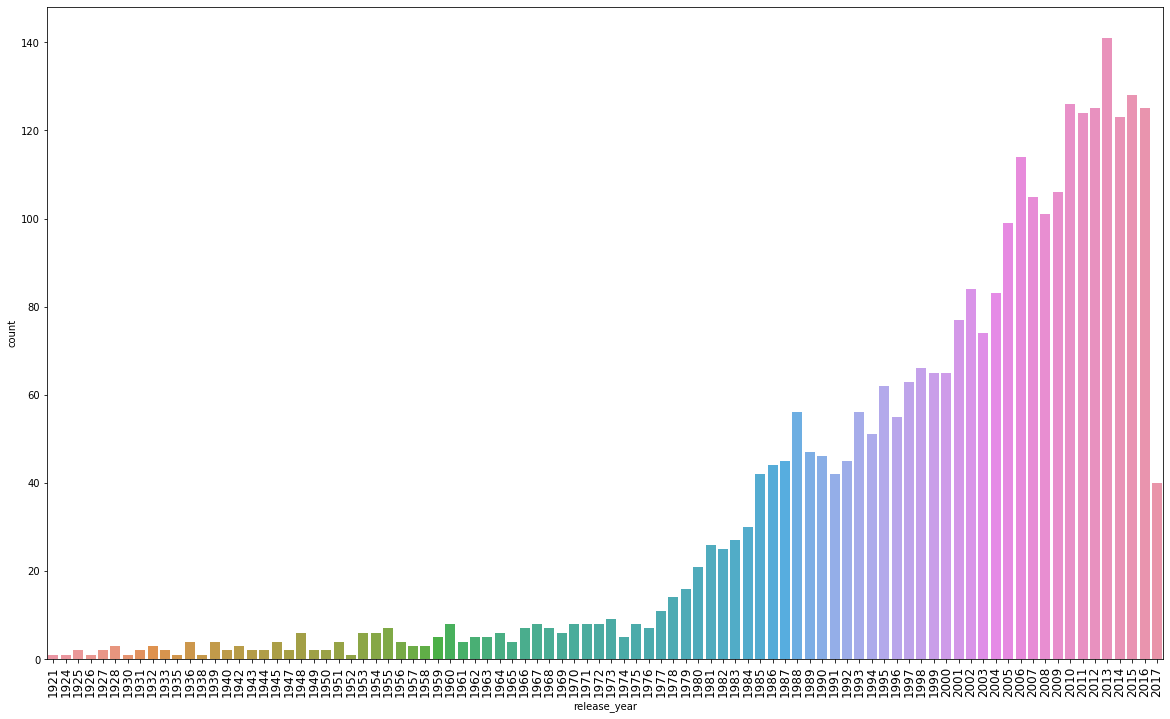

In [15]:
fig, ax = plt.subplots(figsize=(20,12))

sns.countplot(train['release_year'].sort_values())
plt.xticks(fontsize=12,rotation=90)

([<matplotlib.axis.XTick at 0x1e4222bb5c8>,
 <a list of 7 Text xticklabel objects>)

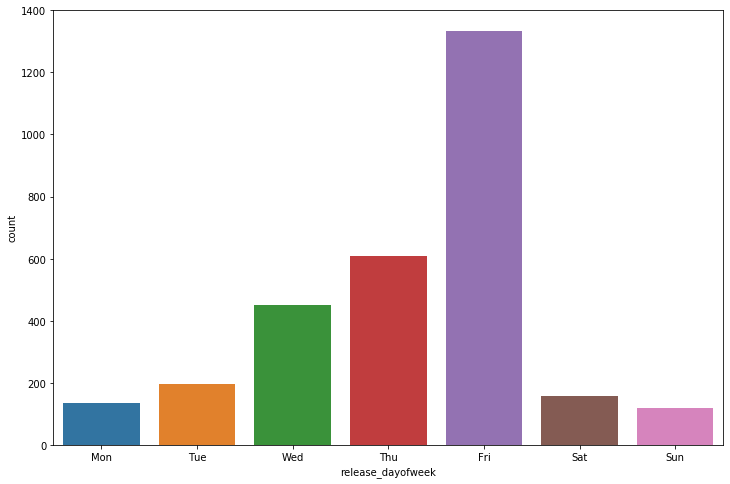

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(train['release_dayofweek'].sort_values())
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels) 

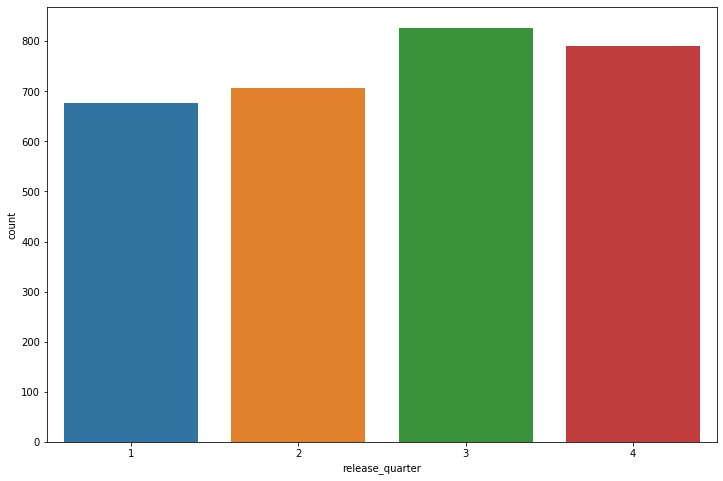

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(train['release_quarter'].sort_values())

In [18]:
#Inserindo dados de Budget/Revenue/Runtime de filme que estão com 0 (dados que podem ser encontrados na internet)
#Dataset de Treino
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1542,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train.id == 391,'runtime'] = 86 #Il peor natagle de la meva vida
train.loc[train.id == 592, 'runtime'] = 90 #А поутру они проснулись
train.loc[train.id == 925, 'runtime'] = 95 #¿Quién mató a Bambi?
train.loc[train.id == 978, 'runtime'] = 93 #La peggior settimana della mia vita
train.loc[train.id == 1256, 'runtime'] = 92 #Cipolla Colt
train.loc[train.id == 1542, 'runtime'] = 93 #Все и сразу
train.loc[train.id == 1875, 'runtime'] = 86 #Vermist
train.loc[train.id == 2151, 'runtime'] = 108 #Mechenosets
train.loc[train.id == 2499, 'runtime'] = 108 #Na Igre 2. Novyy Uroven
train.loc[train.id == 2646, 'runtime'] = 98 #同桌的妳
train.loc[train.id == 2786, 'runtime'] = 111 #Revelation
train.loc[train.id == 2866, 'runtime'] = 96 #Tutto tutto niente niente

In [19]:
#Inserindo dados de Budget/Revenue/Runtime de filme que estão com 0 (dados que podem ser encontrados na internet)
#Dataset de Treino
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test.id == 4074, 'runtime'] = 103 #Shikshanachya Aaicha Gho
test.loc[test.id == 4222, 'runtime'] = 93 #Street Knight
test.loc[test.id == 4431, 'runtime'] = 100 #Плюс один
test.loc[test.id == 5520, 'runtime'] = 86 #Glukhar v kino
test.loc[test.id == 5845, 'runtime'] = 83 #Frau Müller muss weg!
test.loc[test.id == 5849, 'runtime'] = 140 #Shabd
test.loc[test.id == 6210, 'runtime'] = 104 #Le dernier souffle
test.loc[test.id == 6804, 'runtime'] = 145 #Chaahat Ek Nasha..
test.loc[test.id == 7321, 'runtime'] = 87 #El truco del manco

In [22]:
# Inserindo o valor médio de arrecadação por mês, dia do mês, dia da semana e ano de lançamento
train['MeanMonth'] = train.groupby("release_month")["revenue"].transform(lambda x: np.mean(x))
train['MeanDay'] = train.groupby("release_day")["revenue"].transform(lambda x: np.mean(x))
train['MeanDayofweek'] = train.groupby("release_dayofweek")["revenue"].transform(lambda x: np.mean(x))
train['MeanYear'] = train.groupby("release_year")["revenue"].transform(lambda x: np.mean(x))

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


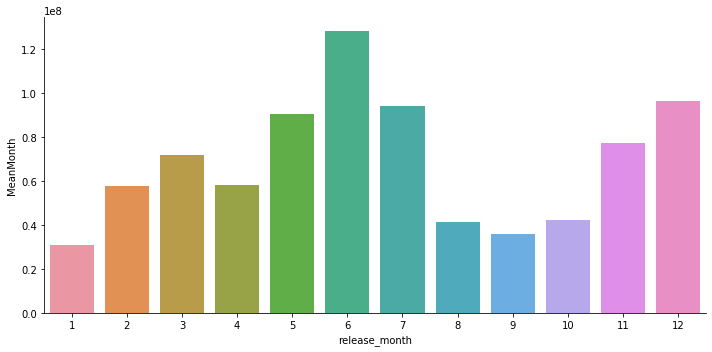

In [23]:
sns.factorplot(x='release_month', y='MeanMonth', data=train, kind='bar', size=5, aspect=2)

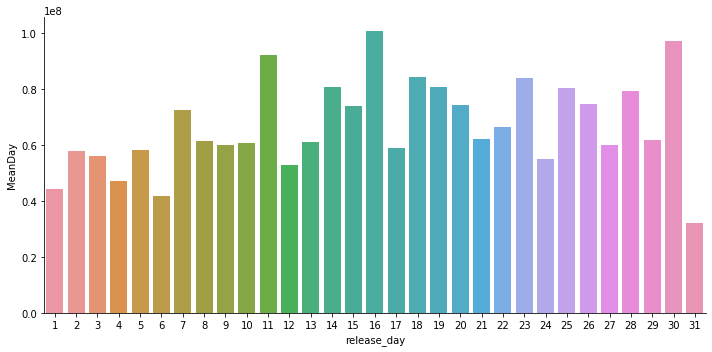

In [24]:
sns.factorplot(x='release_day', y='MeanDay', data=train, kind='bar', size=5, aspect=2)

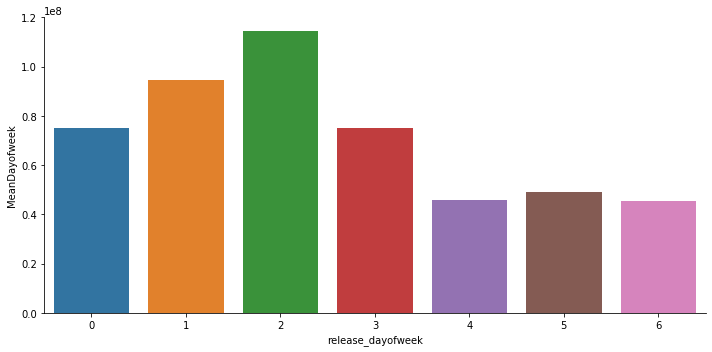

In [25]:
sns.factorplot(x='release_dayofweek', y='MeanDayofweek', data=train, kind='bar', size=5, aspect=2)

(array([0.00e+00, 2.50e+07, 5.00e+07, 7.50e+07, 1.00e+08, 1.25e+08,
        1.50e+08, 1.75e+08, 2.00e+08]), <a list of 9 Text yticklabel objects>)

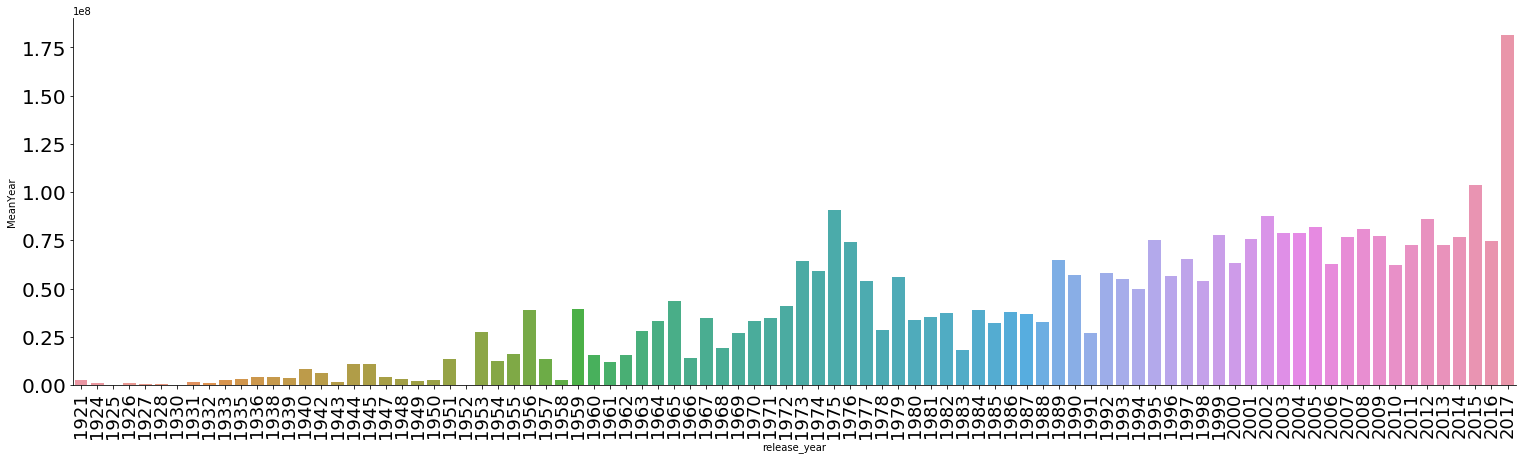

In [26]:
sns.factorplot(x='release_year', y='MeanYear', data=train, kind='bar', size=6, aspect=3.5)
plt.xticks(fontsize=18,rotation=90)
plt.yticks(fontsize=20)

In [27]:
train.shape, test.shape

((3000, 32), (4398, 27))

### Original and Spoken Languages

In [28]:
Counter(train.original_language).most_common(20)

[('en', 2575),
 ('fr', 78),
 ('ru', 47),
 ('es', 43),
 ('hi', 42),
 ('ja', 37),
 ('it', 24),
 ('ko', 20),
 ('cn', 20),
 ('zh', 19),
 ('de', 18),
 ('ta', 16),
 ('sv', 8),
 ('nl', 6),
 ('pt', 6),
 ('fa', 5),
 ('da', 5),
 ('ro', 4),
 ('tr', 3),
 ('hu', 3)]

In [29]:
# Criando colunas Dummies com as 15 línguas mais frequentes
top_original_language = [m[0] for m in Counter(train.original_language).most_common(20)]
for g in top_original_language:
    train['original_language_' + g] = train['original_language'].apply(lambda x: 1 if g in x else 0)
    
for g in top_original_language:
    test['original_language_' + g] = test['original_language'].apply(lambda x: 1 if g in x else 0)

train = train.drop('original_language', axis = True)
test = test.drop('original_language', axis = True)

In [30]:
train.shape, test.shape

((3000, 51), (4398, 46))

In [31]:
# Criando uma coluna apenas com as línguas da coluna 'spoken_languages'
print("raw format:", train['spoken_languages'].iloc[0])

train['spoken_languages'] = train['spoken_languages'].apply(lambda x: list(
    map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))
test['spoken_languages'] = test['spoken_languages'].apply(lambda x: list(
    map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))

train.head().spoken_languages

raw format: [{'iso_639_1': 'en', 'name': 'English'}]


0        [en]
1        [en]
2        [en]
3    [en, hi]
4        [ko]
Name: spoken_languages, dtype: object

In [32]:
print('Number of spoken languages in films')
train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of spoken languages in films


1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

In [33]:
list_of_languages = list(train['spoken_languages'].apply(lambda x: [i for i in x] if x != {} else []).values)
Counter([i for j in list_of_languages for i in j]).most_common(25)

[('en', 2618),
 ('fr', 288),
 ('es', 239),
 ('de', 169),
 ('ru', 152),
 ('it', 124),
 ('ja', 89),
 ('zh', 68),
 ('hi', 56),
 ('pt', 43),
 ('ar', 40),
 ('ko', 37),
 ('cn', 36),
 ('ta', 27),
 ('pl', 25),
 ('hu', 24),
 ('la', 23),
 ('sv', 22),
 ('th', 22),
 ('cs', 20),
 ('he', 15),
 ('el', 15),
 ('tr', 13),
 ('da', 13),
 ('nl', 10)]

In [34]:
# Criando dummies das 30 línguas mais frequentes em 'spoken languages'
train['num_languages'] = train['spoken_languages'].apply(lambda x: len(x) if x != [] else 0)
train['all_languages'] = train['spoken_languages'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train['language_' + g] = train['all_languages'].apply(lambda x: 1 if g in x else 0)
    
test['num_languages'] = test['spoken_languages'].apply(lambda x: len(x) if x != [] else 0)
test['all_languages'] = test['spoken_languages'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != {} else '')
for g in top_languages:
    test['language_' + g] = test['all_languages'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['spoken_languages', 'all_languages'], axis=1)
test = test.drop(['spoken_languages', 'all_languages'], axis=1)

In [35]:
train.shape, test.shape

((3000, 81), (4398, 76))

### Genres

In [36]:
train.genres = train.genres.apply(lambda x: list(
    map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
test.genres = test.genres.apply(lambda x: list(
    map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))

train.genres.head()

0                            [Comedy]
1    [Comedy, Drama, Family, Romance]
2                             [Drama]
3                   [Thriller, Drama]
4                  [Action, Thriller]
Name: genres, dtype: object

In [37]:
list_of_genres = list(train['genres'].apply(lambda x: [i for i in x] if x != [] else []).values)
Counter([i for j in list_of_genres for i in j]).most_common(20)

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [38]:
# Criando colunas Dummies com os 19 gêneros mais frequentes
train['num_genres'] = train['genres'].apply(lambda x: len(x) if x != [] else 0)
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(19)]
for g in top_genres:
    train['genres_' + g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)
    
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != [] else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != {} else '')
for g in top_genres:
    test['genres_' + g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['genres', 'all_genres'], axis=1)
test = test.drop(['genres', 'all_genres'], axis=1)

In [39]:
train.shape, test.shape

((3000, 100), (4398, 95))

### Keywords

In [40]:
train.Keywords = train.Keywords.apply(lambda x: list(map(
    lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
test.Keywords = test.Keywords.apply(lambda x: list(map(
    lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))

train.Keywords.head()

0    [time travel, sequel, hot tub, duringcreditsst...
1        [coronation, duty, marriage, falling in love]
2    [jazz, obsession, conservatory, music teacher,...
3    [mystery, bollywood, police corruption, crime,...
4                                                   []
Name: Keywords, dtype: object

In [41]:
list_of_keywords = list(train['Keywords'].apply(lambda x: [i for i in x] if x != [] else []).values)
Counter([i for j in list_of_keywords for i in j]).most_common(15)

[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73),
 ('revenge', 73),
 ('friendship', 72),
 ('sex', 71),
 ('suspense', 67),
 ('sequel', 66)]

In [42]:
# Criando colunas Dummies com as 30 keywords mais frequentes
train['num_Keywords'] = train['Keywords'].apply(lambda x: len(x) if x != {} else 0)
train['all_Keywords'] = train['Keywords'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != {} else '')
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(20)]
for g in top_keywords:
    train['keyword_' + g] = train['all_Keywords'].apply(lambda x: 1 if g in x else 0)
    
test['num_Keywords'] = test['Keywords'].apply(lambda x: len(x) if x != {} else 0)
test['all_Keywords'] = test['Keywords'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != {} else '')
for g in top_keywords:
    test['keyword_' + g] = test['all_Keywords'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['Keywords', 'all_Keywords'], axis=1)
test = test.drop(['Keywords', 'all_Keywords'], axis=1)

In [43]:
train.shape, test.shape

((3000, 120), (4398, 115))

### Production Companies

In [44]:
train.production_companies = train.production_companies.apply(lambda x: list(map(
    lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))
test.production_companies = test.production_companies.apply(lambda x: list(map(
    lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))

train.production_companies.head()

0    [Paramount Pictures, United Artists, Metro-Gol...
1                               [Walt Disney Pictures]
2    [Bold Films, Blumhouse Productions, Right of W...
3                                                   []
4                                                   []
Name: production_companies, dtype: object

In [45]:
list_of_companies = list(train['production_companies'].apply(lambda x: [i for i in x] if x != {} else []).values)
Counter([i for j in list_of_companies for i in j]).most_common(15)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40)]

In [46]:
# Criando colunas Dummies com as 30 companhias mais frequentes
train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != [] else 0)
train['all_production_companies'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(20)]
for g in top_companies:
    train['production_company_' + g] = train['all_production_companies'].apply(lambda x: 1 if g in x else 0)
    
test['num_companies'] = test['production_companies'].apply(lambda x: len(x) if x != [] else 0)
test['all_production_companies'] = test['production_companies'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != {} else '')
for g in top_companies:
    test['production_company_' + g] = test['all_production_companies'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_companies', 'all_production_companies'], axis=1)
test = test.drop(['production_companies', 'all_production_companies'], axis=1)

In [47]:
train.shape, test.shape

((3000, 140), (4398, 135))

### Production Countries

In [48]:
train.production_countries = train.production_countries.apply(lambda x: list(map(
    lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
test.production_countries = test.production_countries.apply(lambda x: list(map(
    lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))

train.production_countries.head()

0    [United States of America]
1    [United States of America]
2    [United States of America]
3                       [India]
4                 [South Korea]
Name: production_countries, dtype: object

In [49]:
list_of_countries = list(train['production_countries'].apply(lambda x: [i for i in x] if x != {} else []).values)
Counter([i for j in list_of_countries for i in j]).most_common(25)

[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15),
 ('Czech Republic', 14),
 ('Denmark', 13),
 ('Brazil', 12),
 ('Luxembourg', 10),
 ('South Africa', 10)]

In [50]:
# Criando colunas Dummies com os 25 países mais frequentes
train['num_countries'] = train['production_countries'].apply(lambda x: len(x) if x != {} else 0)
train['all_countries'] = train['production_countries'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    train['production_country_' + g] = train['all_countries'].apply(lambda x: 1 if g in x else 0)
    
test['num_countries'] = test['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test['all_countries'] = test['production_countries'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != {} else '')
for g in top_countries:
    test['production_country_' + g] = test['all_countries'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_countries', 'all_countries'], axis=1)
test = test.drop(['production_countries', 'all_countries'], axis=1)

In [51]:
train.shape, test.shape

((3000, 165), (4398, 160))

### Cast and Crew

In [52]:
# Pegando o nome dos atores
train['cast_name'] = train.cast.apply(lambda x: list(map(
    lambda d: list(d.values())[5], ast.literal_eval(x)) if isinstance(x, str) else []))
test['cast_name'] = test.cast.apply(lambda x: list(map(
    lambda d: list(d.values())[5], ast.literal_eval(x)) if isinstance(x, str) else []))

train.cast_name.head()

0    [Rob Corddry, Craig Robinson, Clark Duke, Adam...
1    [Anne Hathaway, Julie Andrews, H√©ctor Elizond...
2    [Miles Teller, J.K. Simmons, Melissa Benoist, ...
3    [Vidya Balan, Nawazuddin Siddiqui, Parambrata ...
4    [Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...
Name: cast_name, dtype: object

In [53]:
list_of_cast_name = list(train.cast_name.apply(lambda x: [i for i in x] if x != [] else []).values)
Counter([i for j in list_of_cast_name for i in j]).most_common(20)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21),
 ('Jason Statham', 21),
 ('Keith David', 21),
 ('John Goodman', 21),
 ('Mel Gibson', 21),
 ('Sigourney Weaver', 21)]

In [54]:
#Criando as colunas categóricas para cast_names
train['num_names'] = train['cast_name'].apply(lambda x: len(x) if x != {} else 0)
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_name for i in j]).most_common(20)]
for g in top_cast_names:
    train['cast_name_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
test['num_names'] = test['cast_name'].apply(lambda x: len(x) if x != {} else 0)
for g in top_cast_names:
    test['cast_name_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
train = train.drop(['cast', 'cast_name'], axis=1)
test = test.drop(['cast', 'cast_name'], axis=1)

In [55]:
train.shape, test.shape

((3000, 185), (4398, 180))

In [56]:
# Pegando o nome da produção
train['crew_name'] = train.crew.apply(lambda x: list(map(
    lambda d: list(d.values())[5], ast.literal_eval(x)) if isinstance(x, str) else []))
test['crew_name'] = test.crew.apply(lambda x: list(map(
    lambda d: list(d.values())[5], ast.literal_eval(x)) if isinstance(x, str) else []))

train.crew_name.head()

0    [Kelly Cantley, Steve Pink, Josh Heald, Josh H...
1    [Garry Marshall, Charles Minsky, John Debney, ...
2    [Terri Taylor, Richard Henderson, Jeffrey Stot...
3              [Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]
4                     [Jong-seok Yoon, Jong-seok Yoon]
Name: crew_name, dtype: object

In [57]:
list_of_crew_name = list(train.crew_name.apply(lambda x: [i for i in x] if x != [] else []).values)
Counter([i for j in list_of_crew_name for i in j]).most_common(25)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30),
 ('Jane Jenkins', 29),
 ('John Debney', 28),
 ('Hans Zimmer', 28),
 ('John Papsidera', 28),
 ('Francis Ford Coppola', 28),
 ('Billy Hopkins', 27),
 ('Danny Elfman', 27),
 ('Mindy Marin', 27),
 ('Hans Bjerno', 26),
 ('Sarah Finn', 26)]

In [58]:
#Criando as colunas categóricas para cast_names
train['num_crew_names'] = train['crew_name'].apply(lambda x: len(x) if x != {} else 0)
top_crew_names = [m[0] for m in Counter([i for j in list_of_cast_name for i in j]).most_common(20)]
for g in top_crew_names:
    train['crew_name_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)
    
test['num_crew_names'] = test['crew_name'].apply(lambda x: len(x) if x != {} else 0)
for g in top_crew_names:
    test['crew_name_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)
    
train = train.drop(['crew', 'crew_name'], axis=1)
test = test.drop(['crew', 'crew_name'], axis=1)

In [59]:
train.shape, test.shape

((3000, 205), (4398, 200))

## Feature Engineering

In [61]:
# Inserindo variáveis que coloquem 1 ou 0 para as colunas 'belongs_to_collection', 'homepage', 'status' e 'title'
train['has_a_collection'] = np.where(train['belongs_to_collection'].isna(), 0, 1)
train['has_a_homepage'] = np.where(train['homepage'].isna(), 0, 1)
train['isReleased'] = np.where(train['status'] != 'Released', 1, 0)
train['diff_title'] = np.where(train['original_title'] != train['title'], 0, 1)

test['has_a_collection'] = np.where(test.belongs_to_collection.isna(), 0, 1) 
test['has_a_homepage'] = np.where(test.homepage.isna(), 0, 1)
test['isReleased'] = np.where(test['status'] != 'Released', 1, 0)
test['diff_title'] = np.where(test['original_title'] != test['title'], 0, 1)

In [63]:
d_train = pd.get_dummies(train, columns=['release_dayofweek', 'release_month'])
d_test = pd.get_dummies(test, columns=['release_dayofweek', 'release_month'])

In [64]:
d_train.shape, d_test.shape

((3000, 226), (4398, 221))

In [65]:
# Colocando a média de runtime do ano para as células vazias na coluna 'runtime'
d_train['runtime'] = d_train.groupby("release_year")["runtime"].transform(lambda x: x.fillna(np.mean(x)))
d_test['runtime'] = d_test.groupby("release_year")["runtime"].transform(lambda x: x.fillna(np.mean(x)))

In [66]:
X = d_train.drop(['id', 'belongs_to_collection', 'homepage', 'imdb_id', 'original_title', 
                        'overview', 'poster_path', 'release_date', 'status', 'tagline',
                  'title', 'revenue', 'MeanMonth', 'MeanYear', 'MeanDayofweek', 'MeanDay'], axis = True)
X_test = d_test.drop(['id', 'belongs_to_collection', 'homepage', 'imdb_id', 'original_title', 
                        'overview', 'poster_path', 'release_date', 'status', 'tagline', 'title'], axis = True)
y = np.log1p(d_train['revenue'])

In [67]:
cols_to_normalize1 = []
for col in X.iloc[:,0:3]:
    if (train[col].skew() > 0.5) | (train[col].skew() < -0.5):
        cols_to_normalize1.append(col)
        
cols_to_normalize2 = []
for col in X_test.iloc[:,0:3]:
    if (train[col].skew() > 0.5) | (train[col].skew() < -0.5):
        cols_to_normalize2.append(col)

In [68]:
print(cols_to_normalize1, cols_to_normalize2) 

['budget', 'popularity', 'runtime'] ['budget', 'popularity', 'runtime']


In [69]:
X['budget'] = np.log1p(X.budget)
X['popularity'] = np.log1p(X.popularity)
X['runtime'] = np.log1p(X.runtime)

X_test['budget'] = np.log1p(X_test.budget)
X_test['popularity'] = np.log1p(X_test.popularity)
X_test['runtime'] = np.log1p(X_test.runtime)

#X['log_budget'] = np.log1p(X.budget)
#X['log_popularity'] = np.log1p(X.popularity)
#X['log_runtime'] = np.log1p(X.runtime)

#X_test['log_budget'] = np.log1p(X_test.budget)
#X_test['log_popularity'] = np.log1p(X_test.popularity)
#X_test['log_runtime'] = np.log1p(X_test.runtime

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = X.iloc[:, 0:9]
sc_test = X_test.iloc[:, 0:9]
sc_train = sc.fit_transform(sc_train)
sc_test = sc.transform(sc_test)

In [71]:
X.iloc[:, 0:9] = sc_train
X_test.iloc[:, 0:9] = sc_test

In [72]:
X.shape, X_test.shape

((3000, 210), (4398, 210))

## Model traning and selection

In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

### XGBoost 

In [75]:
params = {'eta': 0.01,
          'objective': 'reg:linear',
          'max_depth': 7,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'eval_metric': 'rmse',
          'seed': 11,
          'silent': True}

In [76]:
xgb_model = xgb.train(params, 
                  xgb.DMatrix(X_train, y_train),
                  5000,  
                  [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_valid, y_valid), 'valid')], 
                  verbose_eval=200,
                  early_stopping_rounds=200)

[14:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:15.57983	valid-rmse:15.76072
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[200]	train-rmse:2.62548	valid-rmse:2.90746
[400]	train-rmse:1.22093	valid-rmse:1.89611
[600]	train-rmse:1.01097	valid-rmse:1.84325
[800]	train-rmse:0.88927	valid-rmse:1.83154
[1000]	train-rmse:0.77612	valid-rmse:1.82907
[1200]	train-rmse:0.68006	va

In [77]:
y_xgb_valid = xgb_model.predict(xgb.DMatrix(X_valid), ntree_limit=xgb_model.best_ntree_limit)

In [78]:
xgb_reg_model = xgb.XGBRegressor(**params, n_estimators = 2000)
xgb_reg_model.fit(X_train.values, y_train)

[14:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.01,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.00999999978,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=11,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=11,
             silent=True, subsample=0.8, tree_method='exact',
             validate_parameters=1, ...)

In [79]:
y_xreg_valid = xgb_reg_model.predict(X_valid.values)

### LightGBM

In [80]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [81]:
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)
lgb_model.fit(X_train, y_train,
              eval_set = [(X_train, y_train), (X_valid, y_valid)],
              eval_metric = 'rmse',
              verbose=500,
              early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 1.68748	valid_1's rmse: 1.91209
[1000]	training's rmse: 1.48991	valid_1's rmse: 1.88423
Early stopping, best iteration is:
[1013]	training's rmse: 1.48591	valid_1's rmse: 1.88347


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
              boosting='gbdt', feature_fraction=0.9, lambda_l1=0.2,
              learning_rate=0.01, max_depth=5, metric='rmse',
              min_data_in_leaf=20, n_estimators=10000, nthread=4, num_leaves=30,
              objective='regression', verbosity=-1)

In [82]:
y_lgb_valid = lgb_model.predict(X_valid)

### CatBoost

In [83]:
params = {'learning_rate': 0.002,
              'depth': 5,
              'l2_leaf_reg': 10,
              'colsample_bylevel': 0.8,
              'bagging_temperature': 0.2,
              'od_type': 'Iter',
              'od_wait': 100,
              'random_seed': 11,
              'allow_writing_files': False}

In [84]:
cat_model = CatBoostRegressor(iterations=10000,  eval_metric = 'RMSE', **params)
cat_model.fit(X_train,
              y_train,
              eval_set=(X_valid, y_valid),
              cat_features=[],
              use_best_model=True,
              verbose=False)

In [85]:
y_cat_valid = cat_model.predict(X_valid)

## Visualizando a validação e ensemble

In [86]:
print('XGB score:     ', r2_score(y_valid,y_xgb_valid))
print('XGB_reg score: ', r2_score(y_valid,y_xreg_valid))
print('LGB score:     ', r2_score(y_valid,y_lgb_valid))
print('CAT score:     ', r2_score(y_valid,y_cat_valid))

XGB score:      0.614484948512228
XGB_reg score:  0.613709781059935
LGB score:      0.587776802655753
CAT score:      0.6120552866747855


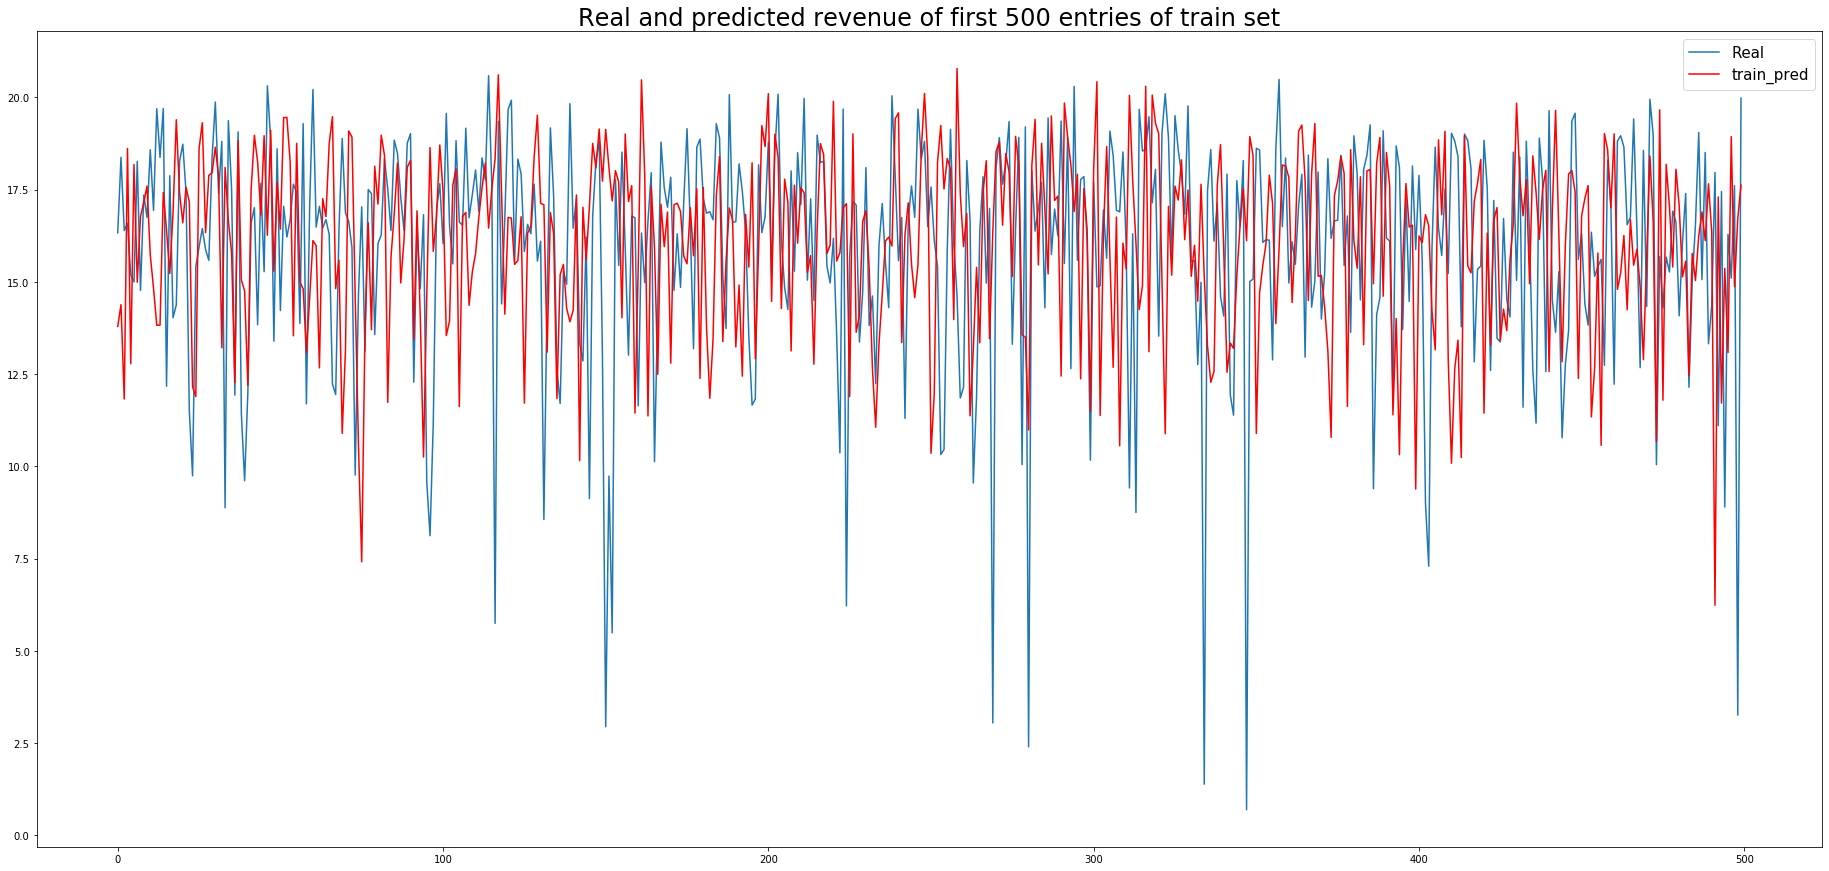

In [87]:
plt.figure(figsize=(32,15))
plt.plot(y[:500],label="Real")
plt.plot(y_xgb_valid[:500],label="train_pred", color='red')
plt.legend(fontsize=15)
plt.title("Real and predicted revenue of first 500 entries of train set",fontsize=24)
plt.show()

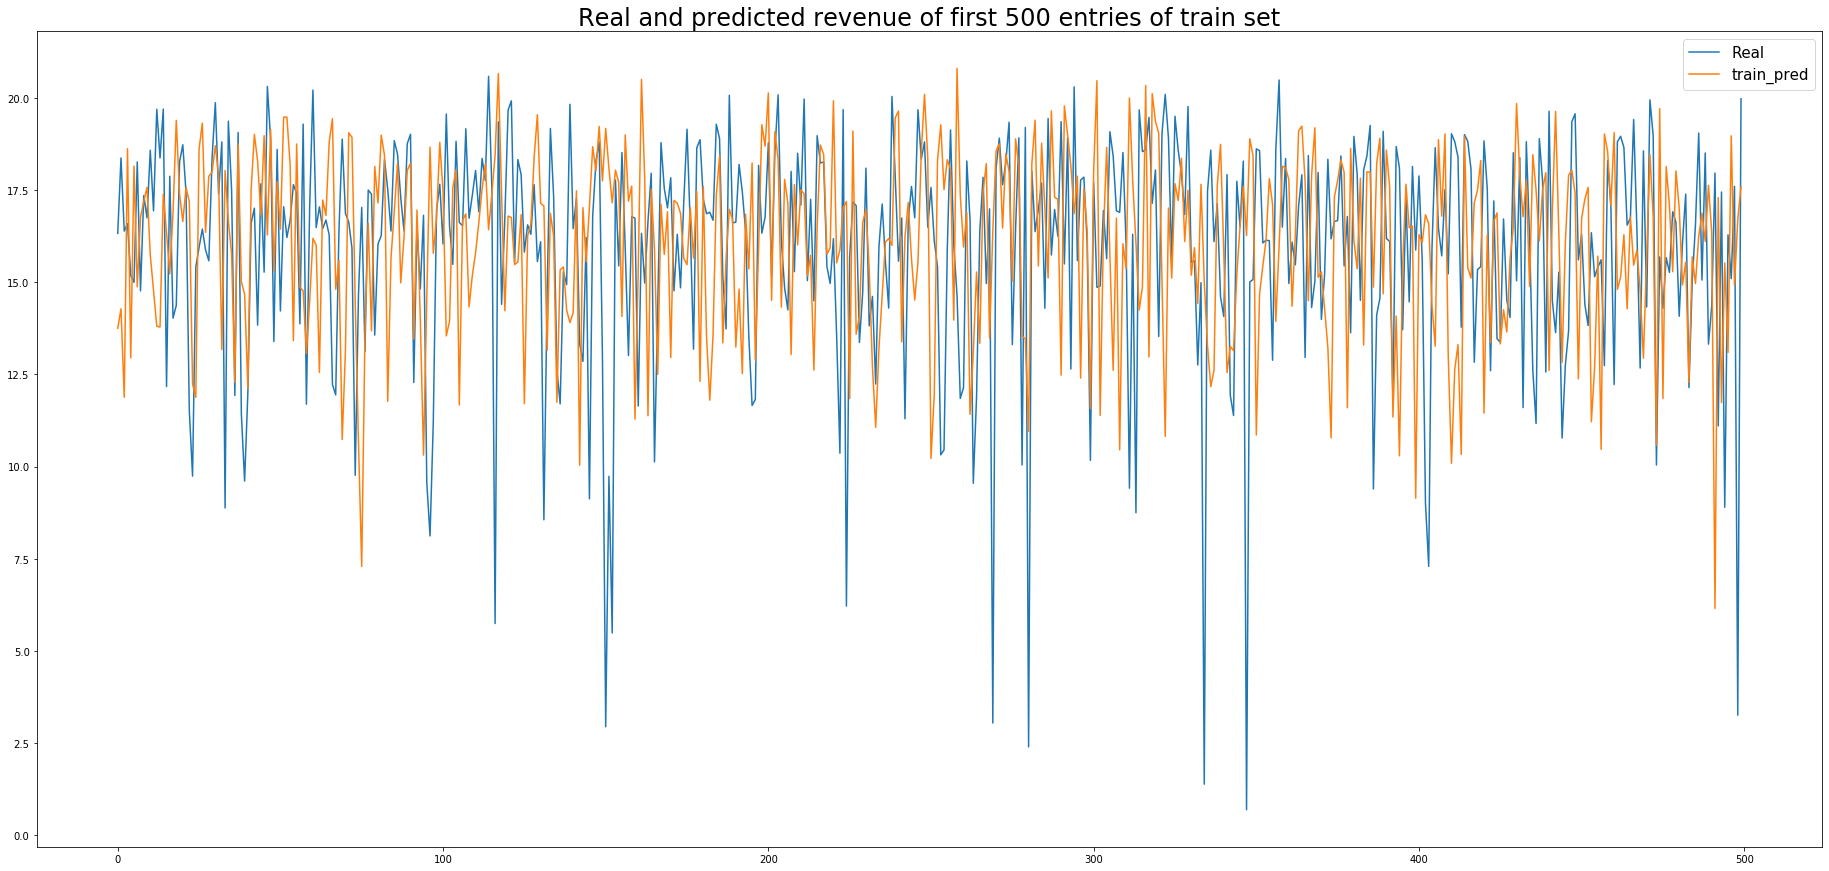

In [88]:
plt.figure(figsize=(32,15))
plt.plot(y[:500],label="Real")
plt.plot(y_xreg_valid[:500],label="train_pred")
plt.legend(fontsize=15)
plt.title("Real and predicted revenue of first 500 entries of train set",fontsize=24)
plt.show()

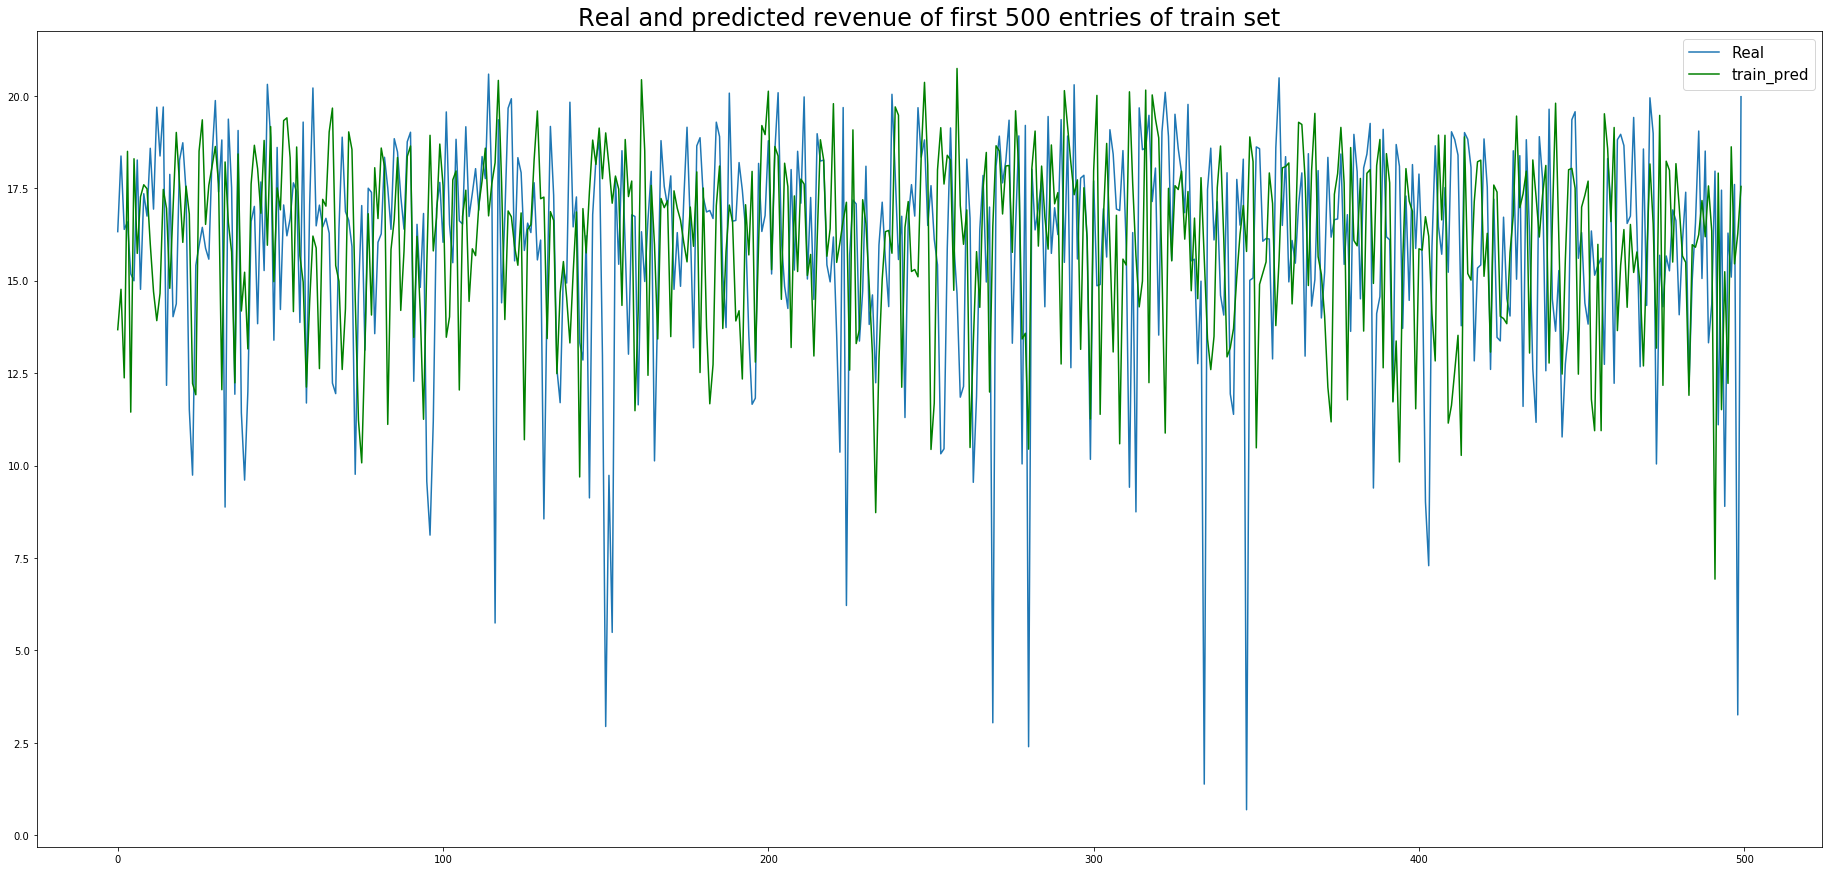

In [89]:
plt.figure(figsize=(32,15))
plt.plot(y[:500],label="Real")
plt.plot(y_lgb_valid[:500],label="train_pred", color="green")
plt.legend(fontsize=15)
plt.title("Real and predicted revenue of first 500 entries of train set",fontsize=24)
plt.show()

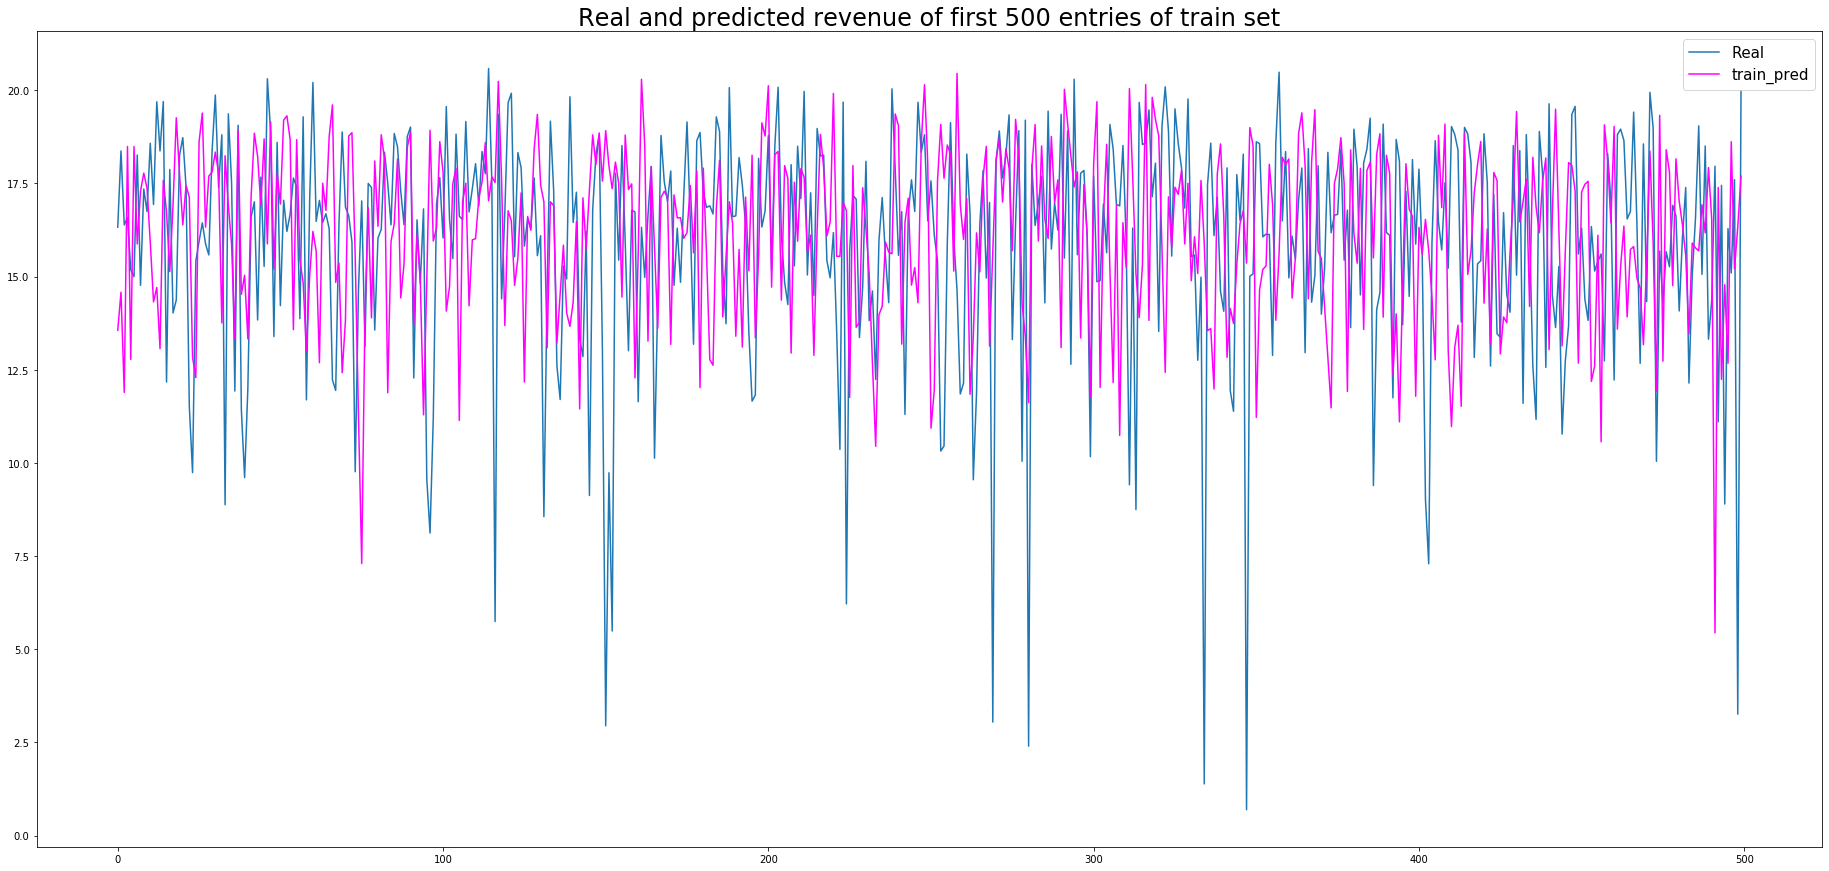

In [90]:
plt.figure(figsize=(32,15))
plt.plot(y[:500],label="Real")
plt.plot(y_cat_valid[:500],label="train_pred", color='magenta')
plt.legend(fontsize=15)
plt.title("Real and predicted revenue of first 500 entries of train set",fontsize=24)
plt.show()

In [100]:
xgb_pred = np.expm1(xgb_model.predict(xgb.DMatrix(X_test), ntree_limit=xgb_model.best_ntree_limit))
regx_pred = np.expm1(xgb_reg_model.predict(X_test.values))
lgb_pred = np.expm1(lgb_model.predict(X_test))
cat_pred = np.expm1(cat_model.predict(X_test))

In [101]:
ens_pred1 = (xgb_pred+regx_pred+cat_pred)/3
ens_pred2 = (xgb_pred*0.4 + lgb_pred*0.2 + cat_pred*0.4)
pd.DataFrame({'id': test.id, 'revenue': ens_pred1}).to_csv('ens1_submission.csv', index=False)
pd.DataFrame({'id': test.id, 'revenue': ens_pred1}).to_csv('ens2_submission.csv', index=False)
pd.DataFrame({'id': test.id, 'revenue': xgb_pred}).to_csv('xgb_submission.csv', index=False)
pd.DataFrame({'id': test.id, 'revenue': regx_pred}).to_csv('regx_submission.csv', index=False)
pd.DataFrame({'id': test.id, 'revenue': lgb_pred}).to_csv('lgb_submission.csv', index=False)
pd.DataFrame({'id': test.id, 'revenue': cat_pred}).to_csv('cat_submission.csv', index=False)